In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import pandas_datareader as pdr



# Pre-process data

In [2]:
df=pd.read_csv('qct_data.csv')
df

指标名称  中间价:美元兑人民币:月:平均值  官方储备资产:外汇储备  出口金额:当月值  进口金额:当月值  出口金额:当月同比  \
0    2011/01          6.602700     29316.74   1506.97   1449.15      37.64   
1    2011/02          6.583133     29913.86    966.81   1045.54       2.35   
2    2011/03          6.566243     30446.74   1521.34   1523.24      35.76   
3    2011/04          6.529232     31458.43   1555.92   1443.70      29.82   
4    2011/05          6.498848     31659.97   1570.51   1441.22      19.28   
..       ...               ...          ...       ...       ...        ...   
133  2022/02          6.347044     32138.27   2174.09   1884.20       6.20   
134  2022/03          6.345722     31879.94   2755.62   2296.03      14.50   
135  2022/04          6.428016     31197.20   2732.57   2225.64       3.70   
136  2022/05          6.707126     31277.80   3077.24   2293.25      16.70   
137  2022/06          6.699129     30712.72   3312.64   2333.23      17.90   

     进口金额:当月同比          M2  M2:同比  CPI:当月同比  ...  baiduindex美元人民币汇率  \
0        51.70   733884.83   17.2     4.900  ...         379.193548   
1        20.00   736130.86   15.7     4.944  ...         342.357143   
2        27.50   758130.88   16.6     5.383  ...         428.870968   
3        21.89   757384.56   15.3     5.344  ...         405.900000   
4        28.44   763409.22   15.1     5.515  ...         413.677419   
..         ...         ...    ...       ...  ...                ...   
133      11.20  2441488.90    9.2     0.900  ...        2201.250000   
134       0.30  2497688.34    9.7     1.500  ...        2767.548387   
135       0.00  2499710.90   10.5     2.100  ...        2932.366667   
136       4.00  2527026.15   11.1     2.100  ...        4391.419355   
137       1.00  2581451.20   11.4     2.500  ...        3178.300000   

     baiduindex美元人民币汇率走势  baiduindex搜索数量平均值  谷歌指数：USDCNY  \
0              24.870968        1384.367742            9   
1              25.250000        1272.435714           10   
2              18.193548        1430.677419            6   
3              18.500000        1533.573333            5   
4              10.096774        1698.425806           10   
..                   ...                ...          ...   
133           113.714286        4316.457143           14   
134           120.903226        6222.070968           17   
135           125.900000        8366.566667           23   
136           223.935484       10192.270970           26   
137           139.266667        6265.226667           19   

     谷歌指数：Dollar RMB exchange rate  谷歌指数：RMB exchange rate  \
0                               47                      64   
1                               41                      53   
2                               83                      73   
3                               61                      72   
4                               66                      67   
..                             ...                     ...   
133                             14                      27   
134                             14                      30   
135                             12                      30   
136                             17                      37   
137                             17                      37   

     谷歌指数：rate of rmb to usd  谷歌指数：dollar to RMB  谷歌指数：dollar to yuan  \
0                         35                  28                   25   
1                         12                  21                   20   
2                         56                  29                   21   
3                          0                  32                   27   
4                         66                  33                   28   
..                       ...                 ...                  ...   
133                       53                  38                   35   
134                       39                  47                   56   
135                       29                  47                   46   
136                   

In [3]:
DATA=df.dropna()

#log scale the data

DATA['官方储备资产:外汇储备'] = np.log(DATA['官方储备资产:外汇储备'])
DATA['出口金额:当月值'] = np.log(DATA['出口金额:当月值'])

DATA['进口金额:当月值'] = np.log(DATA['进口金额:当月值'])
DATA['M2'] = np.log(DATA['M2'])
DATA['期货收盘价(连续):COMEX黄金:月:平均值'] = np.log(DATA['期货收盘价(连续):COMEX黄金:月:平均值'])
DATA['美国:道琼斯工业平均指数:月:平均值'] = np.log(DATA['美国:道琼斯工业平均指数:月:平均值'])
DATA['美国:纳斯达克综合指数:月:平均值'] = np.log(DATA['美国:纳斯达克综合指数:月:平均值'])
DATA['美国:M2'] = np.log(DATA['美国:M2'])
DATA['美国:标准普尔500指数:月:平均值'] = np.log(DATA['美国:标准普尔500指数:月:平均值'])
DATA['深交所:深证成指:月:平均值'] = np.log(DATA['深交所:深证成指:月:平均值'])
DATA['上证综合指数:月:平均值'] = np.log(DATA['上证综合指数:月:平均值'])
DATA['全球:经济政策不确定性指数:按GDP现价加权平均'] = np.log(DATA['全球:经济政策不确定性指数:按GDP现价加权平均'])
DATA['中国:经济政策不确定性指数:新闻指数'] = np.log(DATA['中国:经济政策不确定性指数:新闻指数'])
DATA['美国:经济政策不确定性指数:总指数'] = np.log(DATA['美国:经济政策不确定性指数:总指数'])
DATA['美国:经济政策不确定性指数:新闻指数'] = np.log(DATA['美国:经济政策不确定性指数:新闻指数'])
DATA['baiduindex人民币对美元汇率'] = np.log(DATA['baiduindex人民币对美元汇率'])
DATA['baiduindex人民币汇率'] = np.log(DATA['baiduindex人民币汇率'])
DATA['baiduindex人民币兑美元'] = np.log(DATA['baiduindex人民币兑美元'])
DATA['baiduindex美元人民币汇率'] = np.log(DATA['baiduindex美元人民币汇率'])
DATA['baiduindex搜索数量平均值'] = np.log(DATA['baiduindex搜索数量平均值'])

DATA
DATA.to_csv('all_variables.csv')

<ipython-input-3-45af2b94101a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['官方储备资产:外汇储备'] = np.log(DATA['官方储备资产:外汇储备'])
<ipython-input-3-45af2b94101a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['出口金额:当月值'] = np.log(DATA['出口金额:当月值'])
<ipython-input-3-45af2b94101a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [4]:
LABEL = '中间价:美元兑人民币:月:平均值' # response variable
FEATURES = ('中间价:美元兑人民币:月:平均值','官方储备资产:外汇储备','出口金额:当月值','进口金额:当月值','M2','CPI:当月同比','美国:CPI:当月同比','工业增加值:当月同比','PPI:全部工业品:当月同比','PMI','美元指数:月:平均值','期货结算价(连续):WTI原油:月:平均值','期货收盘价(连续):COMEX黄金:月:平均值','美国:道琼斯工业平均指数:月:平均值','美国:纳斯达克综合指数:月:平均值','美国:M2','美国:标准普尔500指数:月:平均值','美国:标准普尔500波动率指数(VIX):月:平均值','美国:密歇根大学消费者信心指数','深交所:深证成指:月:平均值','上证综合指数:月:平均值','全球:经济政策不确定性指数:按GDP现价加权平均','中国:经济政策不确定性指数:新闻指数','美国:经济政策不确定性指数:总指数','美国:经济政策不确定性指数:新闻指数','CLI_china', 'CLI_US', 'CLI_global', 'baiduindex搜索数量平均值','谷歌指数平均值')[1:] # explanatory variables
FEATURES


('官方储备资产:外汇储备',
 '出口金额:当月值',
 '进口金额:当月值',
 'M2',
 'CPI:当月同比',
 '美国:CPI:当月同比',
 '工业增加值:当月同比',
 'PPI:全部工业品:当月同比',
 'PMI',
 '美元指数:月:平均值',
 '期货结算价(连续):WTI原油:月:平均值',
 '期货收盘价(连续):COMEX黄金:月:平均值',
 '美国:道琼斯工业平均指数:月:平均值',
 '美国:纳斯达克综合指数:月:平均值',
 '美国:M2',
 '美国:标准普尔500指数:月:平均值',
 '美国:标准普尔500波动率指数(VIX):月:平均值',
 '美国:密歇根大学消费者信心指数',
 '深交所:深证成指:月:平均值',
 '上证综合指数:月:平均值',
 '全球:经济政策不确定性指数:按GDP现价加权平均',
 '中国:经济政策不确定性指数:新闻指数',
 '美国:经济政策不确定性指数:总指数',
 '美国:经济政策不确定性指数:新闻指数',
 'CLI_china',
 'CLI_US',
 'CLI_global',
 'baiduindex搜索数量平均值',
 '谷歌指数平均值')

In [5]:
#DATA.loc[:, FEATURES] = scale(DATA.loc[:, FEATURES]) # standardizing indicators
#DATA.loc[:, FEATURES]

In [6]:
df_new=DATA.loc[:, FEATURES]
response=DATA.loc[:,LABEL]
df_new
len(FEATURES)

29

# Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(DATA.loc[:, FEATURES], DATA.loc[:, LABEL], shuffle=False, test_size=0.2)
X_test

官方储备资产:外汇储备  出口金额:当月值  进口金额:当月值         M2  CPI:当月同比  美国:CPI:当月同比  \
109    10.343907  6.689338  7.261028  14.523955       5.2          2.3   
110    10.328962  7.520625  7.406122  14.548322       4.3          1.5   
111    10.338984  7.598314  7.343083  14.554364       3.3          0.3   
112    10.342288  7.632537  7.278015  14.557535       2.4          0.1   
113    10.345711  7.663159  7.427543  14.573953       2.5          0.6   
114    10.359136  7.769966  7.476076  14.569498       2.7          1.0   
115    10.362370  7.759499  7.480270  14.574837       2.4          1.3   
116    10.355379  7.777428  7.617115  14.587508       1.7          1.4   
117    10.350728  7.767391  7.489457  14.580848       0.5          1.2   
118    10.366747  7.889504  7.563528  14.591160      -0.5          1.2   
119    10.378641  7.943385  7.629966  14.597948       0.2          1.4   
120    10.376820  7.877124  7.610729  14.609881      -0.3          1.4   
121    10.375051  7.623818  7.434724  14.620213      -0.2          1.7   
122    10.364081  7.786274  7.736311  14.638145       0.4          2.6   
123    10.372922  7.876354  7.708069  14.631807       0.9          4.2   
124    10.380282  7.877063  7.698192  14.637727       1.3          5.0   
125    10.377860  7.940990  7.744877  14.656124       1.1          5.4   
126    10.384644  7.945431  7.725211  14.649356       1.0          5.4   
127    10.383477  7.985934  7.761042  14.653739       0.8          5.3   
128    10.373687  8.023736  7.771501  14.666870       0.7          5.4   
129    10.378980  8.004947  7.672190  14.664019       1.5          6.2   
130    10.380462  8.085727  7.836346  14.672481       2.3          6.8   
131    10.389046  8.132169  7.809870  14.683829       1.5          7.0   
132    10.380228  8.092741  7.798154  14.703823       0.9          7.5   
133    10.377803  7.684365  7.541259  14.708119       0.9          7.9   
134    10.369732  7.921398  7.738937  14.730876       1.5          8.5   
135    10.348084  7.912998  7.707800  14.731686       2.1          8.3   
136    10.350664  8.031788  7.737725  14.742554       2.1          8.6   

     工业增加值:当月同比  PPI:全部工业品:当月同比   PMI  美元指数:月:平均值  ...  上证综合指数:月:平均值  \
109  -25.867052            -0.4  35.7   98.877460  ...      7.981909   
110   -1.100000            -1.5  52.0   98.789655  ...      7.955798   
111    3.900000            -3.1  50.8   99.866591  ...      7.942402   
112    4.400000            -3.7  50.6   99.587319  ...      7.961051   
113    4.800000            -3.0  50.9   97.096186  ...      7.986416   
114    4.800000            -2.4  51.1   95.592983  ...      8.098286   
115    5.600000            -2.0  51.0   93.033129  ...      8.123918   
116    6.900000            -2.1  51.5   93.408764  ...      8.098297   
117    6.900000            -2.1  51.4   93.405914  ...      8.102205   
118    7.000000            -1.5  52.1   92.604662  ...      8.115367   
119    7.300000            -0.4  51.9   90.480213  ...      8.131448   
120   25.398571             0.3  51.3   90.241765  ...      8.179320   
121   52.339181             1.7  50.6   90.629355  ...      8.182262   
122   14.100000             4.4  51.9   92.035513  ...      8.144092   
123    9.800000             6.8  51.1   91.638386  ...      8.147145   
124    8.800000             9.0  51.0   90.306252  ...      8.163068   
125    8.300000             8.8  50.9   91.057341  ...      8.181959   
126    6.400000             9.0  50.4   92.510541  ...      8.164474   
127    5.300000             9.5  50.1   92.806050  ...      8.158996   
128    3.100000            10.7  49.6   92.975636  ...      8.196220   
129    3.500000            13.5  49.2   93.960176  ...      8.181449   
130    3.800000            12.9  50.1   95.326768  ...      8.171488   
131    4.300000            10.3  50.3   96.207952  ...      8.196172   
132    3.857957             9.1  50.1   95.938267  ...      8.170155   
133   12.795905             8.8  50.2   96.005875  ...    

# Initial Data collection

In [8]:
import statistics

data=X_train['谷歌指数平均值']
X_ols = sm.add_constant(data)
statsmodel = sm.OLS(y_train, X_ols).fit()

print(statistics.mean(data))
print(statistics.stdev(data))
print(statsmodel.summary())




42.068807339908254
11.09756607272714
                            OLS Regression Results                            
Dep. Variable:       中间价:美元兑人民币:月:平均值   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     18.91
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           3.13e-05
Time:                        19:36:36   Log-Likelihood:                -9.0348
No. Observations:                 109   AIC:                             22.07
Df Residuals:                     107   BIC:                             27.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

(array([13., 28., 30., 22.,  6.,  1.,  3.,  2.,  1.,  3.]),
 array([26.16666667, 31.88333334, 37.6       , 43.31666667, 49.03333333,
        54.75      , 60.46666667, 66.18333333, 71.9       , 77.61666666,
        83.33333333]),
 <BarContainer object of 10 artists>)

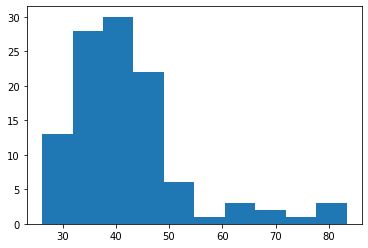

In [9]:
plt.hist(data, bins=10)

# LASSO selection

In [10]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_diabetes

In [12]:
import time
start_time = time.time()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model' ,Lasso())
])

search=GridSearchCV(pipeline,
                               {'model__alpha':np.arange(0,10,0.04)},
                               cv=5,
                               scoring='neg_mean_squared_error',
                               verbose=3
                   
                               )

search.fit(X_train,y_train)

lasso_time=time.time()-start_time
print("--- LASSO time: %s seconds ---" + str(lasso_time) )

import os, psutil
process = psutil.Process()
lasso_memory=process.memory_info().rss
print(process.memory_info().rss)  # in bytes 


Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV 1/5] END .................model__alpha=0.0;, score=-0.093 total time=   0.0s
[CV 2/5] END .................model__alpha=0.0;, score=-0.019 total time=   0.0s
[CV 3/5] END .................model__alpha=0.0;, score=-0.076 total time=   0.0s
[CV 4/5] END .................model__alpha=0.0;, score=-0.108 total time=   0.0s
[CV 5/5] END .................model__alpha=0.0;, score=-0.262 total time=   0.0s
[CV 1/5] END ................model__alpha=0.04;, score=-0.030 total time=   0.0s
[CV 2/5] END ................model__alpha=0.04;, score=-0.010 total time=   0.0s
[CV 3/5] END ................model__alpha=0.04;, score=-0.064 total time=   0.0s
[CV 4/5] END ................model__alpha=0.04;, score=-0.084 total time=   0.0s
[CV 5/5] END ................model__alpha=0.04;, score=-0.106 total time=   0.0s
[CV 1/5] END ................model__alpha=0.08;, score=-0.024 total time=   0.0s
[CV 2/5] END ................model__alpha=0.0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:406: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.885e-02, tolerance: 8.467e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.

[CV 2/5] END ................model__alpha=0.16;, score=-0.073 total time=   0.0s
[CV 3/5] END ................model__alpha=0.16;, score=-0.080 total time=   0.0s
[CV 4/5] END ................model__alpha=0.16;, score=-0.130 total time=   0.0s
[CV 5/5] END ................model__alpha=0.16;, score=-0.206 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.023 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.121 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.091 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.126 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=0.24;, score=-0.021 total time=   0.0s
[CV 2/5] END ................model__alpha=0.24;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=0.24;, score=-0.082 total time=   0.0s
[CV 4/5] END ...............

[CV 4/5] END .................model__alpha=1.0;, score=-0.102 total time=   0.0s
[CV 5/5] END .................model__alpha=1.0;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=1.04;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=1.04;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=1.04;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=1.04;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=1.04;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=1.08;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=1.08;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=1.08;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=1.08;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=1.08;, score=-0.236 total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END ................model__alpha=1.84;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=1.84;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=1.84;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=1.84;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=1.84;, score=-0.236 total time=   0.0s
[CV 1/5] END ..model__alpha=1.8800000000000001;, score=-0.020 total time=   0.0s
[CV 2/5] END ..model__alpha=1.8800000000000001;, score=-0.136 total time=   0.0s
[CV 3/5] END ..model__alpha=1.8800000000000001;, score=-0.082 total time=   0.0s
[CV 4/5] END ..model__alpha=1.8800000000000001;, score=-0.102 total time=   0.0s
[CV 5/5] END ..model__alpha=1.8800000000000001;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=1.92;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=1.92;, score=-0.136 total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END ................model__alpha=2.88;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=2.88;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=2.88;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=2.88;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=2.88;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=2.92;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=2.92;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=2.92;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=2.92;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=2.92;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=2.96;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=2.96;, score=-0.136 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END ................model__alpha=3.88;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=3.92;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=3.92;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=3.92;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=3.92;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=3.92;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=3.96;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=3.96;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=3.96;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=3.96;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=3.96;, score=-0.236 total time=   0.0s
[CV 1/5] END .................model__alpha=4.0;, score=-0.020 total time=   0.0s
[CV 2/5] END ...............

[CV 4/5] END ................model__alpha=4.92;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=4.92;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=4.96;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=4.96;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=4.96;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=4.96;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=4.96;, score=-0.236 total time=   0.0s
[CV 1/5] END .................model__alpha=5.0;, score=-0.020 total time=   0.0s
[CV 2/5] END .................model__alpha=5.0;, score=-0.136 total time=   0.0s
[CV 3/5] END .................model__alpha=5.0;, score=-0.082 total time=   0.0s
[CV 4/5] END .................model__alpha=5.0;, score=-0.102 total time=   0.0s
[CV 5/5] END .................model__alpha=5.0;, score=-0.236 total time=   0.0s
[CV 1/5] END ...............

[CV 2/5] END ................model__alpha=5.96;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=5.96;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=5.96;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=5.96;, score=-0.236 total time=   0.0s
[CV 1/5] END .................model__alpha=6.0;, score=-0.020 total time=   0.0s
[CV 2/5] END .................model__alpha=6.0;, score=-0.136 total time=   0.0s
[CV 3/5] END .................model__alpha=6.0;, score=-0.082 total time=   0.0s
[CV 4/5] END .................model__alpha=6.0;, score=-0.102 total time=   0.0s
[CV 5/5] END .................model__alpha=6.0;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=6.04;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=6.04;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=6.04;, score=-0.082 total time=   0.0s
[CV 4/5] END ...............

[CV 4/5] END .................model__alpha=7.0;, score=-0.102 total time=   0.0s
[CV 5/5] END .................model__alpha=7.0;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=7.04;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=7.04;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=7.04;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=7.04;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=7.04;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=7.08;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=7.08;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=7.08;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=7.08;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=7.08;, score=-0.236 total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END ................model__alpha=8.08;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=8.08;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=8.08;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=8.08;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=8.08;, score=-0.236 total time=   0.0s
[CV 1/5] END ...model__alpha=8.120000000000001;, score=-0.020 total time=   0.0s
[CV 2/5] END ...model__alpha=8.120000000000001;, score=-0.136 total time=   0.0s
[CV 3/5] END ...model__alpha=8.120000000000001;, score=-0.082 total time=   0.0s
[CV 4/5] END ...model__alpha=8.120000000000001;, score=-0.102 total time=   0.0s
[CV 5/5] END ...model__alpha=8.120000000000001;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=8.16;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=8.16;, score=-0.136 total time=   0.0s
[CV 3/5] END ...............

[CV 2/5] END ...model__alpha=9.120000000000001;, score=-0.136 total time=   0.0s
[CV 3/5] END ...model__alpha=9.120000000000001;, score=-0.082 total time=   0.0s
[CV 4/5] END ...model__alpha=9.120000000000001;, score=-0.102 total time=   0.0s
[CV 5/5] END ...model__alpha=9.120000000000001;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=9.16;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=9.16;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=9.16;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=9.16;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=9.16;, score=-0.236 total time=   0.0s
[CV 1/5] END ...model__alpha=9.200000000000001;, score=-0.020 total time=   0.0s
[CV 2/5] END ...model__alpha=9.200000000000001;, score=-0.136 total time=   0.0s
[CV 3/5] END ...model__alpha=9.200000000000001;, score=-0.082 total time=   0.0s
[CV 4/5] END ...model__alpha

In [13]:
search.best_params_
coef=search.best_estimator_[1].coef_
a=np.array(FEATURES)[coef != 0]
a

array(['官方储备资产:外汇储备', '美元指数:月:平均值', '美国:标准普尔500指数:月:平均值',
       '全球:经济政策不确定性指数:按GDP现价加权平均', '中国:经济政策不确定性指数:新闻指数', 'CLI_US',
       'baiduindex搜索数量平均值'], dtype='<U26')

In [16]:
name=('FER', 'EX', 'IM', 'M2','CPI','CPI_US','IVA','PPI','PMI','DXY','WTI','COMEX','DJIA','NASDAQ','AM2','S&P','VIX','MCSI','SZCOMP','SHCOMP','GEPU','CEPU','AEPU','AEPU-NI','CLI_China','CLI_US','CLI_Global','BI','GT')

coef_df = pd.DataFrame({'coef': coef,
                        'varname': name
                       })

<ipython-input-17-8bab41e33d3e>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


(array([-0.15 , -0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,
         0.05 ,  0.075]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

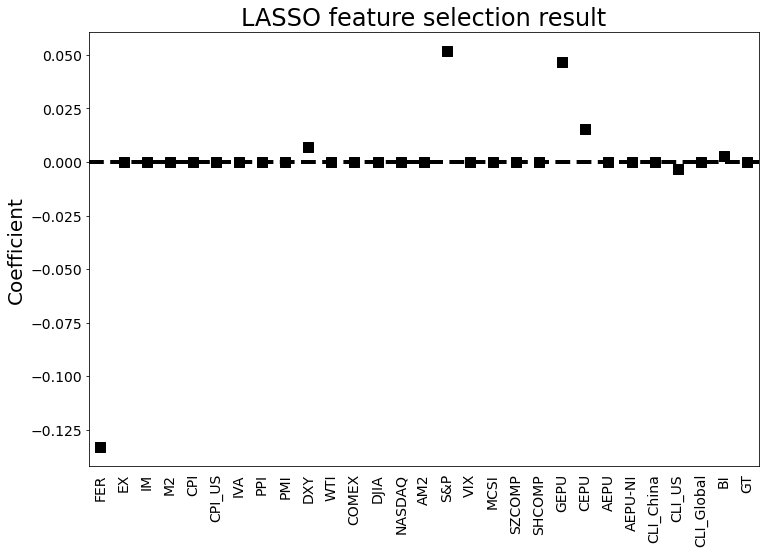

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', legend=False)
ax.set_ylabel('Coefficient', fontsize = 20)
ax.set_xlabel('')
plt.title("LASSO feature selection result", fontsize=24)
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['FER', 'EX', 'IM', 'M2','CPI','CPI_US','IVA','PPI','PMI','DXY','WTI','COMEX','DJIA','NASDAQ','AM2','S&P','VIX','MCSI','SZCOMP','SHCOMP','GEPU','CEPU','AEPU','AEPU-NI','CLI_China','CLI_US','CLI_Global','BI','GT'], 
                       rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# Update features

# Train test split again

In [8]:
LF = ('中间价:美元兑人民币:月:平均值','官方储备资产:外汇储备', '美元指数:月:平均值', '美国:标准普尔500指数:月:平均值','全球:经济政策不确定性指数:按GDP现价加权平均', '中国:经济政策不确定性指数:新闻指数','baiduindex搜索数量平均值')
df=DATA.loc[:, LF]
df

中间价:美元兑人民币:月:平均值  官方储备资产:外汇储备  美元指数:月:平均值  美国:标准普尔500指数:月:平均值  \
0            6.602700    10.285914   79.136667            7.156659   
1            6.583133    10.306077   77.762000            7.186234   
2            6.566243    10.323734   76.260000            7.173564   
3            6.529232    10.356422   74.691429            7.194065   
4            6.498848    10.362808   74.933182            7.199163   
..                ...          ...         ...                 ...   
132          6.358847    10.380228   95.938267            8.428103   
133          6.347044    10.377803   96.005875            8.397504   
134          6.345722    10.369732   98.463757            8.387373   
135          6.428016    10.348084  100.689371            8.387380   
136          6.707126    10.350664  103.084923            8.304089   

     全球:经济政策不确定性指数:按GDP现价加权平均  中国:经济政策不确定性指数:新闻指数  baiduindex搜索数量平均值  
0                    4.702427            5.151443           7.232999  
1                    4.534989            3.830435           7.148688  
2                    4.836210            4.877091           7.265903  
3                    4.742122            5.030511           7.335356  
4                    4.485622            3.263623           7.437457  
..                        ...                 ...                ...  
132                  5.449804            6.367468           8.118476  
133                  5.243335            6.006791           8.370190  
134                  5.801087            6.761499           8.735858  
135                  5.675489            6.738056           9.031999  
136                  5.676240            6.601004           9.229385  

[137 rows x 7 columns]

# Load Models

# Models

In [61]:
import numpy as np
import scipy.stats as stats


def mda(actual: np.ndarray, predicted: np.ndarray):
    predictres=actual[1:]-actual[:-1]
    realres=predicted[1:]-predicted[:-1]

    sign_pre=[]
    sign_rel=[]
    for n in predictres:
        if n > 0:
            sign_pre.append(1)
        else:
            sign_pre.append(0)
    for n in realres:
        if n > 0:
            sign_rel.append(1)
        else:
            sign_rel.append(0)
    num_correct=len(predicted)-np.count_nonzero(np.subtract(sign_pre,sign_rel))
    this_mda=num_correct/(len(predicted))
    return this_mda

In [62]:
import pandas as pd
import numpy as np
import time
import os, psutil

df = pd.read_csv('all_variables.csv')
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('指标名称',axis=1)
import warnings
warnings.filterwarnings('ignore')

all_data = np.array(df)

# Train set test set split
row = 0.2*(all_data.shape[0])
x_train_initial = all_data[:-int(row), 1:]
x_test_initial = all_data[-int(row):, 1:]

y_train_initial = all_data[:-int(row), 0]
y_test_initial = all_data[-int(row):, 0]

# Standard Scaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit(x_train_initial)
x_train = x_scaler.transform(x_train_initial)
x_test = x_scaler.transform(x_test_initial)

y_scaler = y_scaler.fit(y_train_initial.reshape(-1,1))
y_train = y_scaler.transform(y_train_initial.reshape(-1,1))
y_test = y_scaler.transform(y_test_initial.reshape(-1,1))

process = psutil.Process()
pre_memory=process.memory_info().rss


### MODELS
#Model 1: SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()
start_time = time.time()

svr.fit(x_train, y_train.ravel())
y_pre = svr.predict(x_test)

print("--- SVR time: %s seconds ---" % (time.time() - start_time))
y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_svr_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_svr_pre)
rmse_svr = RMSE(y_test_rel,y_svr_pre)
mape_svr = MAPE(y_test_rel,y_svr_pre)
da_svr=mda(y_test_rel,y_svr_pre)
print('svr的MAE为：'+str(mae_svr))
print('svr的RMSE为：'+str(rmse_svr)) 
print('svr的DA为：'+str(da_svr))

process = psutil.Process()
svr_memory=process.memory_info().rss

#Model 2: Extreme Learning Machinge (ELM)
#A. Akusok, K. -M. Björk, Y. Miche and A. Lendasse, "High-Performance Extreme Learning Machines: A Complete Toolbox for Big Data 
#Applications," in IEEE Access, vol. 3, pp. 1011-1025, 2015, doi: 10.1109/ACCESS.2015.2450498.
from hpelm import ELM
start_time = time.time()
elm=ELM(44, 1)
elm.add_neurons(1, "sigm")
elm.add_neurons(1, "rbf_l2")
elm.train(x_train, y_train, "LOO")
y_pre = elm.predict(x_test)
print("--- ELM time: %s seconds ---" % (time.time() - start_time))

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_elm_pre = y_test_pre
mae_elm = MAE(y_test_rel,y_elm_pre)
rmse_elm = RMSE(y_test_rel,y_elm_pre)
mape_elm = MAPE(y_test_rel,y_elm_pre)
da_elm=mda(y_test_rel,y_elm_pre)
print('elm的MAE为：'+str(mae_elm))
print('elm的RMSE为：'+str(rmse_elm))
print('elm的DA为：'+str(da_elm))
process = psutil.Process()
elm_memory=process.memory_info().rss

#Model 3: LSTM
import os
import random
import tensorflow as tf
np.random.seed(1000)
os.environ['PYTHONHASHSEED'] = '0'
random.seed(1000)
tf.random.set_seed(1000)

#Reshape our model
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
start_time = time.time()
verbose = 0
model = Sequential()
model.add(LSTM(12,input_shape=(44,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)
print("--- LSTM time: %s seconds ---" % (time.time() - start_time))

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_lstm_pre = y_test_pre
mae_lstm = MAE(y_test_rel,y_lstm_pre)
rmse_lstm = RMSE(y_test_rel,y_lstm_pre)
mape_lstm = MAPE(y_test_rel,y_lstm_pre)
da_lstm=mda(y_test_rel,y_lstm_pre)
print('LSTM的MAE为：'+str(mae_lstm)) 
print('LSTM的RMSE为：'+str(rmse_lstm)) 
print('LSTM的DA为：'+str(da_lstm))

process = psutil.Process()
lstm_memory=process.memory_info().rss

#Model 4: Bidirectional LSTM
#Reshape our model
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

from keras.layers import Bidirectional
start_time = time.time()
verbose = 0
model = Sequential()
model.add(Bidirectional(LSTM(16,input_shape=(44,1))))
#model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100+100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)
print("--- BiLSTM time: %s seconds ---" % (time.time() - start_time))
y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_bilstm_pre = y_test_pre
mae_bilstm = MAE(y_test_rel,y_bilstm_pre)
rmse_bilstm = RMSE(y_test_rel,y_bilstm_pre)
mape_bilstm = MAPE(y_test_rel,y_bilstm_pre)
da_bilstm=mda(y_test_rel,y_bilstm_pre)
print('BiLSTM的MAE为：'+str(mae_bilstm)) 
print('BiLSTM的RMSE为：'+str(rmse_bilstm)) 
print('BiLSTM的DA为：'+str(da_bilstm))

process = psutil.Process()
bilstm_memory=process.memory_info().rss

#Model 5: Kernel ELM
#jlsuarezdiaz. (2020). KELMOR. Github. Retrieved November 22, 2022, from https://github.com/jlsuarezdiaz/KELMOR.
from sys import path
path.append(".")
start_time = time.time()
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

kelmor = KELMOR(C=2, kernel="rbf")
kelmor.fit(x_train,y_train)

y_pre = kelmor.predict(x_test)
print("--- KELM time: %s seconds ---" % (time.time() - start_time))

y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_kelm_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_kelm = MAE(y_test_rel,y_kelm_pre)
rmse_kelm = RMSE(y_test_rel,y_kelm_pre)
mape_kelm = MAPE(y_test_rel,y_kelm_pre)
da_kelm=mda(y_test_rel,y_kelm_pre)
print('KELM的MAE为：'+str(mae_kelm))
print('KELM的RMSE为：'+str(rmse_kelm))
print('KELM的DA为：'+str(da_kelm))

process = psutil.Process()
kelm_memory=process.memory_info().rss

#Model 6: Gated Recurrent Unit
from keras.layers import GRU
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
start_time = time.time()
verbose = 0
model = Sequential()
model.add(GRU(16,input_shape=(44,1)))
#model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100+100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)
print("--- GRU time: %s seconds ---" % (time.time() - start_time))

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_gru_pre = y_test_pre
mae_gru = MAE(y_test_rel,y_gru_pre)
rmse_gru = RMSE(y_test_rel,y_gru_pre)
mape_gru = MAPE(y_test_rel,y_gru_pre)
print('GRU的MAE为：'+str(mae_gru)) 
print('GRU的RMSE为：'+str(rmse_gru)) 

process = psutil.Process()
gru_memory=process.memory_info().rss

#7 TCN
from tcn import TCN
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
start_time = time.time()
model = Sequential()
model.add(TCN(16,input_shape=(44,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)

y_pre = model.predict(x_test1)
print("--- TCN time: %s seconds ---" % (time.time() - start_time))
y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_tcn_pre = y_test_pre
mae_tcn = MAE(y_test_rel,y_tcn_pre)
rmse_tcn = RMSE(y_test_rel,y_tcn_pre)
mape_tcn = MAPE(y_test_rel,y_tcn_pre)
print('TCN的MAE为：'+str(mae_tcn)) 
print('TCN的RMSE为：'+str(rmse_tcn)) 

process = psutil.Process()
tcn_memory=process.memory_info().rss

print('svr: ' + str(svr_memory-pre_memory))
print('elm: ' + str(elm_memory - svr_memory))
print('lstm: ' + str(lstm_memory - elm_memory))
print('bilstm: ' + str(bilstm_memory-lstm_memory))
print('kelm: ' + str(kelm_memory-bilstm_memory))
print('gru: ' + str(gru_memory-kelm_memory))
print('tcn: ' + str(tcn_memory-gru_memory))

svr1=y_svr_pre
elm1=y_elm_pre
kelm1=y_kelm_pre
lstm1=y_lstm_pre
bilstm1=y_bilstm_pre
gru1=y_gru_pre
tcn1=y_tcn_pre



--- SVR time: 0.0014271736145019531 seconds ---
svr的MAE为：0.17467930907931356
svr的RMSE为：0.21494076610890406
svr的DA为：0.4074074074074074
--- ELM time: 0.0013170242309570312 seconds ---
elm的MAE为：0.38246498299485526
elm的RMSE为：0.41227877093920895
elm的DA为：0.4444444444444444
1/1 [==============================] - 0s 302ms/step
--- LSTM time: 4.934782981872559 seconds ---
LSTM的MAE为：0.33775098835518846
LSTM的RMSE为：0.38865610969766584
LSTM的DA为：0.4074074074074074
1/1 [==============================] - 1s 581ms/step
--- BiLSTM time: 13.621414184570312 seconds ---
BiLSTM的MAE为：0.10293972506873011
BiLSTM的RMSE为：0.13246957660974223
BiLSTM的DA为：0.6296296296296297
--- KELM time: 0.010899066925048828 seconds ---
KELM的MAE为：0.25253214477777786
KELM的RMSE为：0.2773742285590236
KELM的DA为：0.6296296296296297
1/1 [==============================] - 0s 273ms/step
--- GRU time: 8.985599040985107 seconds ---
GRU的MAE为：0.3457952103038827
GRU的RMSE为：0.3742311841317265
1/1 [==============================] - 0s 235ms/step
--- TC

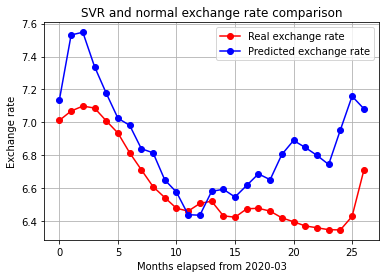

In [13]:
np.reshape(svr1, 27)
plt.plot(y_test_initial,color='red', marker='o' , label='Real exchange rate')
plt.plot(svr1,color='blue',marker='o',label='Predicted exchange rate')
plt.legend()
plt.title('SVR and normal exchange rate comparison')
plt.xlabel('Months elapsed from 2020-03')
plt.ylabel('Exchange rate')
plt.grid(True)
plt.show()

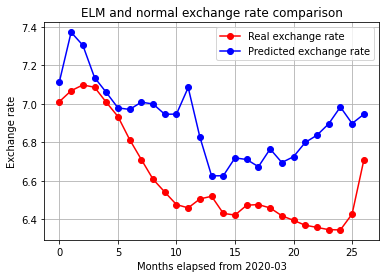

In [14]:
np.reshape(elm1, 27)
plt.plot(y_test_initial,color='red', marker='o' , label='Real exchange rate')
plt.plot(elm1,color='blue',marker='o',label='Predicted exchange rate')
plt.legend()
plt.title('ELM and normal exchange rate comparison')
plt.xlabel('Months elapsed from 2020-03')
plt.ylabel('Exchange rate')
plt.grid(True)
plt.show()

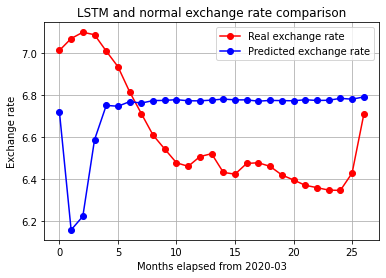

In [15]:
np.reshape(y_lstm_pre, 27)
plt.plot(y_test_initial,color='red', marker='o' , label='Real exchange rate')
plt.plot(y_lstm_pre,color='blue',marker='o',label='Predicted exchange rate')
plt.legend()
plt.title('LSTM and normal exchange rate comparison')
plt.xlabel('Months elapsed from 2020-03')
plt.ylabel('Exchange rate')
plt.grid(True)
plt.show()

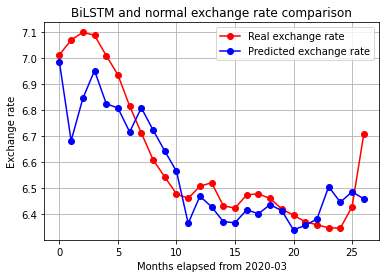

In [16]:
np.reshape(bilstm1, 27)
plt.plot(y_test_initial,color='red', marker='o' , label='Real exchange rate')
plt.plot(bilstm1,color='blue',marker='o',label='Predicted exchange rate')
plt.legend()
plt.title('BiLSTM and normal exchange rate comparison')
plt.xlabel('Months elapsed from 2020-03')
plt.ylabel('Exchange rate')
plt.grid(True)
plt.show()

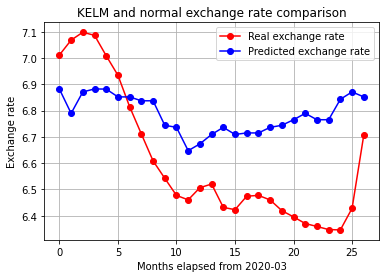

In [17]:
np.reshape(kelm1, 27)
plt.plot(y_test_initial,color='red', marker='o' , label='Real exchange rate')
plt.plot(kelm1,color='blue',marker='o',label='Predicted exchange rate')
plt.legend()
plt.title('KELM and normal exchange rate comparison')
plt.xlabel('Months elapsed from 2020-03')
plt.ylabel('Exchange rate')
plt.grid(True)
plt.show()

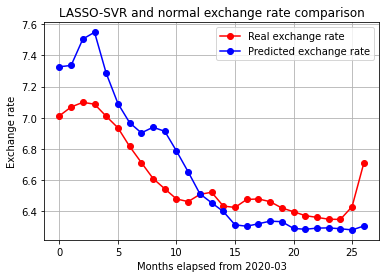

In [19]:
np.reshape(y_svr_pre, 27)
plt.plot(y_test_initial,color='red', marker='o' , label='Real exchange rate')
plt.plot(y_svr_pre,color='blue',marker='o',label='Predicted exchange rate')
plt.legend()
plt.title('LASSO-SVR and normal exchange rate comparison')
plt.xlabel('Months elapsed from 2020-03')
plt.ylabel('Exchange rate')
plt.grid(True)
plt.show()

# With LASSO

In [63]:
import pandas as pd
import numpy as np
df = pd.read_csv('filtered_data.csv', index_col=0)

import warnings
warnings.filterwarnings('ignore')

#result from lasso
lasso_time=8.67914628982544


#Change data shape
sequence_length = 6
horizon = 1
data = np.array(df.iloc[:,0]).reshape([-1,1])

all_data = []
for dta in range(len(data) - sequence_length-horizon+1):
    all_data.append(data[dta: dta + sequence_length])

all_data = np.array(all_data)
all_data = all_data.reshape(all_data.shape[0],all_data.shape[1])
ydata = data[horizon+sequence_length-1:]
ydata = pd.DataFrame(list(ydata))

#ydata = list(ydata)
all_data = pd.DataFrame(all_data)
all_data["y"] = ydata
all_data = np.array(all_data)

#train test split
row = round(0.2 * int(data.shape[0]))
x_train_initial = all_data[:-int(row), :-1]
x_test_initial = all_data[-int(row):, :-1]
y_train_initial = all_data[:-int(row), -1]
y_test_initial = all_data[-int(row):, -1]


#Scaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit(x_train_initial)
x_train = x_scaler.transform(x_train_initial)
x_test = x_scaler.transform(x_test_initial)

y_scaler = y_scaler.fit(y_train_initial.reshape(-1,1))
y_train = y_scaler.transform(y_train_initial.reshape(-1,1))
y_test = y_scaler.transform(y_test_initial.reshape(-1,1))

process = psutil.Process()
pre_memory=process.memory_info().rss

# MODELS
#Model 1: SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
start_time = time.time()
svr = SVR(kernel='poly')
svr.fit(x_train, y_train.ravel())

y_pre = svr.predict(x_test)
print("--- LASSO-SVR time: %s seconds ---" % (time.time() - start_time + lasso_time))
y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_svr_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_svr_pre)
rmse_svr = RMSE(y_test_rel,y_svr_pre)
mape_svr = MAPE(y_test_rel,y_svr_pre)
da_svr=mda(y_test_rel,y_svr_pre)
print('svr的MAE为：'+str(mae_svr)) #"MAE:"
print('svr的RMSE为：'+str(rmse_svr)) #"RMSE:"
print('SVR的MDA为：'+str(da_svr))

process = psutil.Process()
svr_memory=process.memory_info().rss

#MODEL 2: ELM
from hpelm import ELM
start_time = time.time()
elm=ELM(6, 1)
elm.add_neurons(1, "sigm")
elm.add_neurons(1, "rbf_l2")
elm.train(x_train, y_train, "LOO")
y_pre = elm.predict(x_test)
print("--- LASSO-ELM time: %s seconds ---" % (time.time() - start_time + lasso_time))

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_elm_pre = y_test_pre
mae_elm = MAE(y_test_rel,y_elm_pre)
rmse_elm = RMSE(y_test_rel,y_elm_pre)
mape_elm = MAPE(y_test_rel,y_elm_pre)
da_elm=mda(y_test_rel,y_elm_pre)
print('elm的MAE为：'+str(mae_elm)) 
print('elm的RMSE为：'+str(rmse_elm)) 
print('elm的MDA为：'+str(da_elm))

process = psutil.Process()
elm_memory=process.memory_info().rss

#Model 3: LSTM

import os
import random
import tensorflow as tf

np.random.seed(1000)

os.environ['PYTHONHASHSEED'] = '0'
random.seed(1000)
tf.random.set_seed(1000)

amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
start_time = time.time()
verbose = 0
model = Sequential()
model.add(LSTM(12,input_shape=(6,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)
print("--- LASSO-LSTM time: %s seconds ---" % (time.time() - start_time + lasso_time))

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_lstm_pre = y_test_pre
mae_lstm = MAE(y_test_rel,y_lstm_pre)
rmse_lstm = RMSE(y_test_rel,y_lstm_pre)
mape_lstm = MAPE(y_test_rel,y_lstm_pre)
da_lstm=mda(y_test_rel,y_lstm_pre)
print('LSTM的MAE为：'+str(mae_lstm)) #"MAE:"
print('LSTM的RMSE为：'+str(rmse_lstm)) #"RMSE:"
print('LSTM的MDA为：'+str(da_lstm))

process = psutil.Process()
lstm_memory=process.memory_info().rss

#Model 4: BiLSTM
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import Bidirectional
start_time = time.time()
verbose = 0
model = Sequential()
model.add(Bidirectional(LSTM(16,input_shape=(6,1))))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=400+400,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)
print("--- LASSO-BiLSTM time: %s seconds ---" % (time.time() - start_time + lasso_time))

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_bilstm_pre = y_test_pre
mae_bilstm = MAE(y_test_rel,y_bilstm_pre)
rmse_bilstm = RMSE(y_test_rel,y_bilstm_pre)
mape_bilstm = MAPE(y_test_rel,y_bilstm_pre)
da_bilstm=mda(y_test_rel,y_bilstm_pre)
print('BiLSTM的MAE为：'+str(mae_bilstm)) #"MAE:"
print('BiLSTM的RMSE为：'+str(rmse_bilstm)) #"RMSE:"
print('BiLSTM的MDA为：'+str(da_bilstm))

process = psutil.Process()
bilstm_memory=process.memory_info().rss

# Model 5: KELM
from sys import path

path.append(".") 
start_time = time.time()
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

kelmor = KELMOR(C=2, kernel="rbf")
kelmor.fit(x_train,y_train)

y_pre = kelmor.predict(x_test)
print("--- LASSO-KELM time: %s seconds ---" % (time.time() - start_time + lasso_time))

y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_kelm_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_kelm = MAE(y_test_rel,y_kelm_pre)
rmse_kelm = RMSE(y_test_rel,y_kelm_pre)
mape_kelm = MAPE(y_test_rel,y_kelm_pre)
da_kelm=mda(y_test_rel,y_kelm_pre)
print('KELM的MAE为：'+str(mae_kelm)) #"MAE:"
print('KELM的RMSE为：'+str(rmse_kelm)) #"RMSE:"
print('KELM的MDA为：'+str(da_kelm))

process = psutil.Process()
kelm_memory=process.memory_info().rss

#Model 6: Gated Recurrent Unit
from keras.layers import GRU
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
start_time = time.time()
verbose = 0
model = Sequential()
model.add(GRU(8,input_shape=(6,1)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100+100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)
print("--- LASSO-GRU time: %s seconds ---" % (time.time() - start_time + lasso_time))
y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_gru_pre = y_test_pre
mae_gru = MAE(y_test_rel,y_gru_pre)
rmse_gru = RMSE(y_test_rel,y_gru_pre)
mape_gru = MAPE(y_test_rel,y_gru_pre)
print('GRU的MAE为：'+str(mae_gru)) 
print('GRU的RMSE为：'+str(rmse_gru)) 

process = psutil.Process()
gru_memory=process.memory_info().rss

#7 TCN
from tcn import TCN
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
start_time = time.time()
model = Sequential()
model.add(TCN(8,input_shape=(6,1)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)

y_pre = model.predict(x_test1)
print("--- LASSO-TCN time: %s seconds ---" % (time.time() - start_time + lasso_time))
y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_tcn_pre = y_test_pre
mae_tcn = MAE(y_test_rel,y_tcn_pre)
rmse_tcn = RMSE(y_test_rel,y_tcn_pre)
mape_tcn = MAPE(y_test_rel,y_tcn_pre)
print('TCN的MAE为：'+str(mae_tcn)) 
print('TCN的RMSE为：'+str(rmse_tcn)) 

process = psutil.Process()
tcn_memory=process.memory_info().rss  # in bytes 

#print('lasso-svr: ' + str(svr_memory-pre_memory+lasso_memory))
#print('lasso-elm: ' + str(elm_memory - svr_memory+lasso_memory))
#print('lasso-lstm: ' + str(lstm_memory - elm_memory+lasso_memory))
#print('lasso-bilstm: ' + str(bilstm_memory-lstm_memory+lasso_memory))
#print('lasso-kelm: ' + str(kelm_memory-bilstm_memory+lasso_memory))
#print('lasso-gru: ' + str(gru_memory-bilstm_memory+lasso_memory))
#print('lasso-tcn: ' + str(tcn_memory-gru_memory+lasso_memory))

--- LASSO-SVR time: 8.687108516693115 seconds ---
svr的MAE为：0.18980421270187595
svr的RMSE为：0.22782608506243368
SVR的MDA为：0.6666666666666666
--- LASSO-ELM time: 8.681645393371582 seconds ---
elm的MAE为：0.16417149035517078
elm的RMSE为：0.20879819755169754
elm的MDA为：0.5185185185185185
1/1 [==============================] - 0s 249ms/step
--- LASSO-LSTM time: 11.099291324615479 seconds ---
LSTM的MAE为：0.10784239099793835
LSTM的RMSE为：0.15197996393107832
LSTM的MDA为：0.6296296296296297
1/1 [==============================] - 1s 713ms/step
--- LASSO-BiLSTM time: 19.960782289505005 seconds ---
BiLSTM的MAE为：0.05142446781774449
BiLSTM的RMSE为：0.07217863907075474
BiLSTM的MDA为：0.7777777777777778
--- LASSO-KELM time: 8.689933061599731 seconds ---
KELM的MAE为：0.09563212525925929
KELM的RMSE为：0.12579295690359388
KELM的MDA为：0.7407407407407407
1/1 [==============================] - 0s 235ms/step
--- LASSO-GRU time: 12.02732539176941 seconds ---
GRU的MAE为：0.06743250982706707
GRU的RMSE为：0.09117269612536646
1/1 [====================

In [64]:
n_lookback=6
num_prediction=6
prediction_list = y_test

for _ in range(num_prediction):
    X_ = prediction_list[- n_lookback:]  # last available input sequence
    X_ = X_.reshape(1, n_lookback, 1)
    Y_ = model.predict(X_).reshape(-1, 1)
    #Y_ = y_scaler.inverse_transform(Y_)
    prediction_list = np.append(prediction_list, Y_)
    #prediction_list = prediction_list[n_lookback-1:]



1/1 [==============================] - 0s 15ms/step


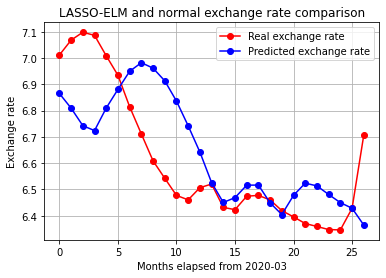

In [20]:
np.reshape(y_elm_pre, 27)
plt.plot(y_test_initial,color='red', marker='o' , label='Real exchange rate')
plt.plot(y_elm_pre,color='blue',marker='o',label='Predicted exchange rate')
plt.legend()
plt.title('LASSO-ELM and normal exchange rate comparison')
plt.xlabel('Months elapsed from 2020-03')
plt.ylabel('Exchange rate')
plt.grid(True)
plt.show()

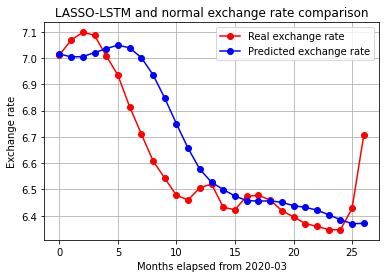

In [21]:
np.reshape(y_lstm_pre, 27)
plt.plot(y_test_initial,color='red', marker='o' , label='Real exchange rate')
plt.plot(y_lstm_pre,color='blue',marker='o',label='Predicted exchange rate')
plt.legend()
plt.title('LASSO-LSTM and normal exchange rate comparison')
plt.xlabel('Months elapsed from 2020-03')
plt.ylabel('Exchange rate')
plt.grid(True)
plt.show()

In [99]:
y_bilstm_pre=[6.8777657, 6.907618 , 6.9607015, 6.9978385, 7.008308 , 6.949605 ,
       6.8818374, 6.7849426, 6.692178 , 6.606255 , 6.54431  , 6.489641 ,
       6.4667625, 6.49263  , 6.525712 , 6.4924526, 6.4669995, 6.480762 ,
       6.4905496, 6.490873 , 6.4712415, 6.4389486, 6.40321  , 6.3819027,
       6.367779 , 6.3631196, 6.4109163, 6.62038411347132,
 6.685408528380249,
 6.74739505199552,
 6.798900191587208,
 6.832692515113204,
 6.847464353709982]

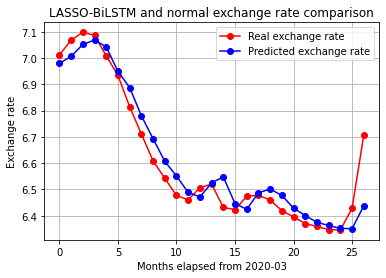

In [5]:
#np.reshape(y_bilstm_pre, 27) 

#y_bilstm_pre1 = y_bilstm_pre + lst
plt.plot(y_test_initial,color='red', marker='o', label='Real exchange rate')
plt.plot(y_bilstm_pre,color='blue',marker='o',   label='Predicted exchange rate')
plt.legend()
plt.title('LASSO-BiLSTM and normal exchange rate comparison')
plt.xlabel('Months elapsed from 2020-03')
plt.ylabel('Exchange rate')
plt.grid(True)
plt.show()

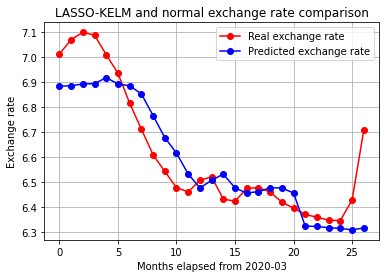

In [23]:
np.reshape(y_kelm_pre, 27)
plt.plot(y_test_initial,color='red', marker='o' , label='Real exchange rate')
plt.plot(y_kelm_pre,color='blue',marker='o',label='Predicted exchange rate')
plt.legend()
plt.title('LASSO-KELM and normal exchange rate comparison')
plt.xlabel('Months elapsed from 2020-03')
plt.ylabel('Exchange rate')
plt.grid(True)
plt.show()

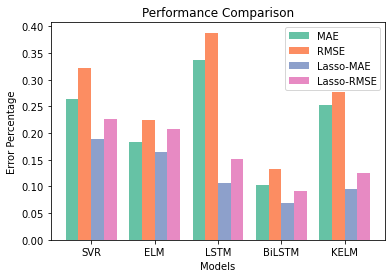

In [30]:
X=["SVR", "ELM", "LSTM", "BiLSTM", "KELM"]
Y = [0.264,0.184,0.337,0.103,0.252]
Z = [0.322,0.225,0.388,0.132,0.277]
A=[0.189,0.164,0.107,0.069,0.095]
B=[0.227,0.208,0.151,0.091,0.125]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, Y, 0.2, label = 'MAE', color='#66c2a5')
plt.bar(X_axis - 0.1, Z, 0.2, label = 'RMSE', color='#fc8d62')
plt.bar(X_axis + 0.1, A, 0.2, label = 'Lasso-MAE', color='#8da0cb')
plt.bar(X_axis + 0.3, B, 0.2, label = 'Lasso-RMSE', color='#e78ac3')

  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Error Percentage")
plt.title("Performance Comparison")
plt.legend()
plt.show()

# DM Test

In [4]:
from scipy.stats import t
import collections
def dm_test(real_values, pred1, pred2, h=1, harvey_adj=True):

    e1_lst = []
    e2_lst = []
    d_lst = []

    real_values = pd.Series(real_values).apply(lambda x: float(x)).tolist()
    pred1 = pd.Series(pred1).apply(lambda x: float(x)).tolist()
    pred2 = pd.Series(pred2).apply(lambda x: float(x)).tolist()

    # Length of forecasts
    T = float(len(real_values))

    # Construct loss differential according to error criterion (MSE)
    for real, p1, p2 in zip(real_values, pred1, pred2):
        e1_lst.append((real - p1)**2)
        e2_lst.append((real - p2)**2)
    for e1, e2 in zip(e1_lst, e2_lst):
        d_lst.append(e1 - e2)

    # Mean of loss differential
    mean_d = pd.Series(d_lst).mean()

    # Calculate autocovariance 
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
            autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    
    # Calculate the denominator of DM stat
    gamma = []
    for lag in range(0, h):
        gamma.append(autocovariance(d_lst, len(d_lst), lag, mean_d))  # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    
    # Calculate DM stat
    DM_stat = V_d**(-0.5)*mean_d

    # Calculate and apply Harvey adjustement
    # It applies a correction for small sample
    if harvey_adj is True:
        harvey_adj = ((T+1-2*h+h*(h-1)/T)/T)**(0.5)
        DM_stat = harvey_adj*DM_stat 

    # Calculate p-value
    p_value = 2*t.cdf(-abs(DM_stat), df=T - 1)

    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    result = dm_return(DM=DM_stat, p_value=p_value)

    return result


In [41]:
results = dm_test(y_test_initial, y_lstm_pre.flatten(), y_kelm_pre.flatten(), h=1, harvey_adj=True)
print(results)

dm_return(DM=1.1778052580460008, p_value=0.2495429778310791)


# Different LASSO selection

In [34]:
print('WHEN THERES 5 variables selected')

import pandas as pd
import numpy as np
#df = pd.read_csv('filtered_data.csv', index_col=0)

import warnings
warnings.filterwarnings('ignore')
sequence_length = 5
horizon = 1
data = np.array(df.iloc[:,0]).reshape([-1,1])

all_data = []
for dta in range(len(data) - sequence_length-horizon+1):
    all_data.append(data[dta: dta + sequence_length])

all_data = np.array(all_data)
all_data = all_data.reshape(all_data.shape[0],all_data.shape[1])
ydata = data[horizon+sequence_length-1:]
ydata = pd.DataFrame(list(ydata))
#ydata = list(ydata)
all_data = pd.DataFrame(all_data)
all_data["y"] = ydata
all_data = np.array(all_data)
#split data
row = round(0.2 * int(data.shape[0]))
x_train_initial = all_data[:-int(row), :-1]
x_test_initial = all_data[-int(row):, :-1]
y_train_initial = all_data[:-int(row), -1]
y_test_initial = all_data[-int(row):, -1]

#Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit(x_train_initial)
x_train = x_scaler.transform(x_train_initial)
x_test = x_scaler.transform(x_test_initial)

y_scaler = y_scaler.fit(y_train_initial.reshape(-1,1))
y_train = y_scaler.transform(y_train_initial.reshape(-1,1))
y_test = y_scaler.transform(y_test_initial.reshape(-1,1))

#MODELS
#Model 1: SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='poly')
svr.fit(x_train, y_train.ravel())

y_pre = svr.predict(x_test)
y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_svr_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_svr_pre)
rmse_svr = RMSE(y_test_rel,y_svr_pre)
mape_svr = MAPE(y_test_rel,y_svr_pre)
print('svr的MAE为：'+str(mae_svr)) #"MAE:"
print('svr的RMSE为：'+str(rmse_svr)) #"RMSE:"

#Model 2: ELM
from hpelm import ELM

elm=ELM(5, 1)
elm.add_neurons(1, "sigm")
elm.add_neurons(1, "rbf_l2")
elm.train(x_train, y_train, "LOO")
y_pre = elm.predict(x_test)


y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_elm_pre = y_test_pre
mae_elm = MAE(y_test_rel,y_elm_pre)
rmse_elm = RMSE(y_test_rel,y_elm_pre)
mape_elm = MAPE(y_test_rel,y_elm_pre)
print('elm的MAE为：'+str(mae_elm)) #"MAE:"
print('elm的RMSE为：'+str(rmse_elm)) #"RMSE:"



#Model 3: LSTM

import os
import random
import tensorflow as tf

np.random.seed(1000)

os.environ['PYTHONHASHSEED'] = '0'
random.seed(1000)
tf.random.set_seed(1000)
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
verbose = 0
model = Sequential()
model.add(LSTM(12,input_shape=(5,1)))
#model.add(LSTM(12))#,return_sequences=True
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_lstm_pre = y_test_pre
mae_lstm = MAE(y_test_rel,y_lstm_pre)
rmse_lstm = RMSE(y_test_rel,y_lstm_pre)
mape_lstm = MAPE(y_test_rel,y_lstm_pre)
print('LSTM的MAE为：'+str(mae_lstm)) #"MAE:"
print('LSTM的RMSE为：'+str(rmse_lstm)) #"RMSE:"

#Model 4: BiLSTM
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import Bidirectional
verbose = 0
model = Sequential()
model.add(Bidirectional(LSTM(16,input_shape=(5,1))))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100+100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_bilstm_pre = y_test_pre
mae_bilstm = MAE(y_test_rel,y_bilstm_pre)
rmse_bilstm = RMSE(y_test_rel,y_bilstm_pre)
mape_bilstm = MAPE(y_test_rel,y_bilstm_pre)
print('BiLSTM的MAE为：'+str(mae_bilstm)) #"MAE:"
print('BiLSTM的RMSE为：'+str(rmse_bilstm)) #"RMSE:"

#Model 5: KELM
from sys import path
path.append(".") 

kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

kelmor = KELMOR(C=2, kernel="rbf")
kelmor.fit(x_train,y_train)

y_pre = kelmor.predict(x_test)

y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_kelm_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_kelm = MAE(y_test_rel,y_kelm_pre)
rmse_kelm = RMSE(y_test_rel,y_kelm_pre)
mape_kelm = MAPE(y_test_rel,y_kelm_pre)
print('KELM的MAE为：'+str(mae_kelm)) #"MAE:"
print('KELM的RMSE为：'+str(rmse_kelm)) #"RMSE:"

WHEN THERES 5 variables selected
svr的MAE为：0.20390425336250667
svr的RMSE为：0.25062713881697046
elm的MAE为：0.12171617909999297
elm的RMSE为：0.15578440914177233
1/1 [==============================] - 0s 386ms/step
LSTM的MAE为：0.1099370316693432
LSTM的RMSE为：0.15461481301691912
1/1 [==============================] - 1s 558ms/step
BiLSTM的MAE为：0.07863308358120838
BiLSTM的RMSE为：0.09783607017419009
KELM的MAE为：0.09615591962962967
KELM的RMSE为：0.12650300849755838


In [35]:
print('WHEN THERES 4 variables selected')

import pandas as pd
import numpy as np
#df = pd.read_csv('filtered_data.csv', index_col=0)

import warnings
warnings.filterwarnings('ignore')
sequence_length = 4
horizon = 1
data = np.array(df.iloc[:,0]).reshape([-1,1])

all_data = []
for dta in range(len(data) - sequence_length-horizon+1):
    all_data.append(data[dta: dta + sequence_length])

all_data = np.array(all_data)
all_data = all_data.reshape(all_data.shape[0],all_data.shape[1])
ydata = data[horizon+sequence_length-1:]
ydata = pd.DataFrame(list(ydata))
#ydata = list(ydata)
all_data = pd.DataFrame(all_data)
all_data["y"] = ydata
all_data = np.array(all_data)
#split data
row = round(0.2 * int(data.shape[0]))
#creating training data
x_train_initial = all_data[:-int(row), :-1]
x_test_initial = all_data[-int(row):, :-1]
y_train_initial = all_data[:-int(row), -1]
y_test_initial = all_data[-int(row):, -1]


#Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit(x_train_initial)
x_train = x_scaler.transform(x_train_initial)
x_test = x_scaler.transform(x_test_initial)

y_scaler = y_scaler.fit(y_train_initial.reshape(-1,1))
y_train = y_scaler.transform(y_train_initial.reshape(-1,1))
y_test = y_scaler.transform(y_test_initial.reshape(-1,1))

#MODELS
#Model 1: SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='poly')
svr.fit(x_train, y_train.ravel())

y_pre = svr.predict(x_test)
y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_svr_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_svr_pre)
rmse_svr = RMSE(y_test_rel,y_svr_pre)
mape_svr = MAPE(y_test_rel,y_svr_pre)
print('svr的MAE为：'+str(mae_svr)) #"MAE:"
print('svr的RMSE为：'+str(rmse_svr)) #"RMSE:"

#Model 2: ELM
from hpelm import ELM

elm=ELM(4, 1)
elm.add_neurons(1, "sigm")
elm.add_neurons(1, "rbf_l2")
elm.train(x_train, y_train, "LOO")
y_pre = elm.predict(x_test)


y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_elm_pre = y_test_pre
mae_elm = MAE(y_test_rel,y_elm_pre)
rmse_elm = RMSE(y_test_rel,y_elm_pre)
mape_elm = MAPE(y_test_rel,y_elm_pre)
print('elm的MAE为：'+str(mae_elm)) #"MAE:"
print('elm的RMSE为：'+str(rmse_elm)) #"RMSE:"


#Model 3: LSTM
import os
import random
import tensorflow as tf

np.random.seed(1000)

os.environ['PYTHONHASHSEED'] = '0'
random.seed(1000)
tf.random.set_seed(1000)

amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
verbose = 0
model = Sequential()
model.add(LSTM(12,input_shape=(4,1)))
#model.add(LSTM(12))#,return_sequences=True
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_lstm_pre = y_test_pre
mae_lstm = MAE(y_test_rel,y_lstm_pre)
rmse_lstm = RMSE(y_test_rel,y_lstm_pre)
mape_lstm = MAPE(y_test_rel,y_lstm_pre)
print('LSTM的MAE为：'+str(mae_lstm)) #"MAE:"
print('LSTM的RMSE为：'+str(rmse_lstm)) #"RMSE:"

#Model 4: BiLSTM
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import Bidirectional
verbose = 0
model = Sequential()
model.add(Bidirectional(LSTM(16,input_shape=(4,1))))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100+100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_bilstm_pre = y_test_pre
mae_bilstm = MAE(y_test_rel,y_bilstm_pre)
rmse_bilstm = RMSE(y_test_rel,y_bilstm_pre)
mape_bilstm = MAPE(y_test_rel,y_bilstm_pre)
print('BiLSTM的MAE为：'+str(mae_bilstm)) #"MAE:"
print('BiLSTM的RMSE为：'+str(rmse_bilstm)) #"RMSE:"

#Model 5: KELM
from sys import path

path.append(".") 

kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

kelmor = KELMOR(C=2, kernel="rbf")
kelmor.fit(x_train,y_train)

y_pre = kelmor.predict(x_test)

y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_kelm_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_kelm = MAE(y_test_rel,y_kelm_pre)
rmse_kelm = RMSE(y_test_rel,y_kelm_pre)
mape_kelm = MAPE(y_test_rel,y_kelm_pre)
print('KELM的MAE为：'+str(mae_kelm)) #"MAE:"
print('KELM的RMSE为：'+str(rmse_kelm)) #"RMSE:"

WHEN THERES 4 variables selected
svr的MAE为：0.16267756079906998
svr的RMSE为：0.18690736622624557
elm的MAE为：0.09707973845123663
elm的RMSE为：0.12008597608048528
1/1 [==============================] - 0s 322ms/step
LSTM的MAE为：0.10028264130191154
LSTM的RMSE为：0.14098783531432482
1/1 [==============================] - 1s 571ms/step
BiLSTM的MAE为：0.08071390469555666
BiLSTM的RMSE为：0.10326796156157386
KELM的MAE为：0.09543864522222227
KELM的RMSE为：0.1258931953021798


In [50]:
print('WHEN THERES 7 variables selected')

#Selected by LASSO
LF = ('中间价:美元兑人民币:月:平均值','官方储备资产:外汇储备', '美元指数:月:平均值', '美国:标准普尔500指数:月:平均值','全球:经济政策不确定性指数:按GDP现价加权平均', '中国:经济政策不确定性指数:新闻指数','CLI_US','baiduindex搜索数量平均值')
df=DATA.loc[:, LF]

import pandas as pd
import numpy as np
#df = pd.read_csv('filtered_data.csv', index_col=0)

import warnings
warnings.filterwarnings('ignore')
sequence_length = 7
horizon = 1
data = np.array(df.iloc[:,0]).reshape([-1,1])

all_data = []
for dta in range(len(data) - sequence_length-horizon+1):
    all_data.append(data[dta: dta + sequence_length])

all_data = np.array(all_data)
all_data = all_data.reshape(all_data.shape[0],all_data.shape[1])
ydata = data[horizon+sequence_length-1:]
ydata = pd.DataFrame(list(ydata))
#ydata = list(ydata)
all_data = pd.DataFrame(all_data)
all_data["y"] = ydata
all_data = np.array(all_data)
#split data
row = round(0.2 * int(data.shape[0]))
#creating training data
x_train_initial = all_data[:-int(row), :-1]
x_test_initial = all_data[-int(row):, :-1]
y_train_initial = all_data[:-int(row), -1]
y_test_initial = all_data[-int(row):, -1]

#Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit(x_train_initial)
x_train = x_scaler.transform(x_train_initial)
x_test = x_scaler.transform(x_test_initial)

y_scaler = y_scaler.fit(y_train_initial.reshape(-1,1))
y_train = y_scaler.transform(y_train_initial.reshape(-1,1))
y_test = y_scaler.transform(y_test_initial.reshape(-1,1))

#MODELS
#Model 1: SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='poly')
svr.fit(x_train, y_train.ravel())

y_pre = svr.predict(x_test)
y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_svr_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_svr_pre)
rmse_svr = RMSE(y_test_rel,y_svr_pre)
mape_svr = MAPE(y_test_rel,y_svr_pre)
print('svr的MAE为：'+str(mae_svr)) #"MAE:"
print('svr的RMSE为：'+str(rmse_svr)) #"RMSE:"

#Model 2: ELM
from hpelm import ELM

elm=ELM(7, 1)
elm.add_neurons(1, "sigm")
elm.add_neurons(1, "rbf_l2")
elm.train(x_train, y_train, "LOO")
y_pre = elm.predict(x_test)


y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_elm_pre = y_test_pre
mae_elm = MAE(y_test_rel,y_elm_pre)
rmse_elm = RMSE(y_test_rel,y_elm_pre)
mape_elm = MAPE(y_test_rel,y_elm_pre)
print('elm的MAE为：'+str(mae_elm)) #"MAE:"
print('elm的RMSE为：'+str(rmse_elm)) #"RMSE:"


#Model 3: LSTM

import os
import random
import tensorflow as tf

np.random.seed(1000)

os.environ['PYTHONHASHSEED'] = '0'
random.seed(1000)
tf.random.set_seed(1000)

amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
verbose = 0
model = Sequential()
model.add(LSTM(12,input_shape=(7,1)))
#model.add(LSTM(12))#,return_sequences=True
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_lstm_pre = y_test_pre
mae_lstm = MAE(y_test_rel,y_lstm_pre)
rmse_lstm = RMSE(y_test_rel,y_lstm_pre)
mape_lstm = MAPE(y_test_rel,y_lstm_pre)
print('LSTM的MAE为：'+str(mae_lstm)) #"MAE:"
print('LSTM的RMSE为：'+str(rmse_lstm)) #"RMSE:"

#Model 4: BiLSTM
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
from keras.layers import Bidirectional
verbose = 0
model = Sequential()
model.add(Bidirectional(LSTM(16,input_shape=(7,1))))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100+100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_bilstm_pre = y_test_pre
mae_bilstm = MAE(y_test_rel,y_bilstm_pre)
rmse_bilstm = RMSE(y_test_rel,y_bilstm_pre)
mape_bilstm = MAPE(y_test_rel,y_bilstm_pre)
print('BiLSTM的MAE为：'+str(mae_bilstm)) #"MAE:"
print('BiLSTM的RMSE为：'+str(rmse_bilstm)) #"RMSE:"

#Model 5: KELM
from sys import path

path.append(".") 

kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

kelmor = KELMOR(C=2, kernel="rbf")
kelmor.fit(x_train,y_train)

y_pre = kelmor.predict(x_test)

y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_kelm_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_kelm = MAE(y_test_rel,y_kelm_pre)
rmse_kelm = RMSE(y_test_rel,y_kelm_pre)
mape_kelm = MAPE(y_test_rel,y_kelm_pre)
print('KELM的MAE为：'+str(mae_kelm)) #"MAE:"
print('KELM的RMSE为：'+str(rmse_kelm)) #"RMSE:"


WHEN THERES 4 variables selected
svr的MAE为：0.19929299820032376
svr的RMSE为：0.2395491335421744
elm的MAE为：0.19328801156448344
elm的RMSE为：0.23666983808016295
1/1 [==============================] - 0s 286ms/step
LSTM的MAE为：0.12727864989889864
LSTM的RMSE为：0.17432092186609788
1/1 [==============================] - 1s 516ms/step
BiLSTM的MAE为：0.07271243473094798
BiLSTM的RMSE为：0.09831426210642864
KELM的MAE为：0.10044981455555559
KELM的RMSE为：0.129255537953701
